In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Asus/Downloads/day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

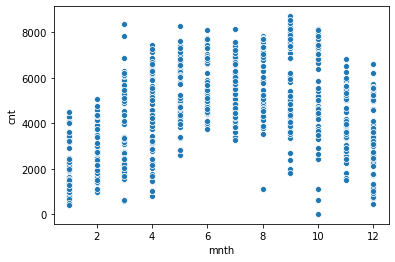

In [6]:
sns.scatterplot(data=df,x="mnth", y="cnt")

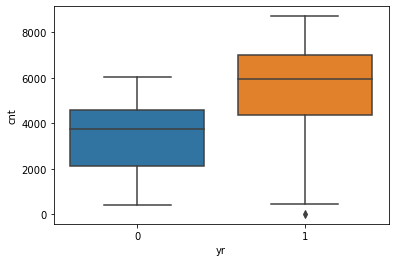

In [7]:
sns.boxplot(data=df,x="yr", y="cnt")

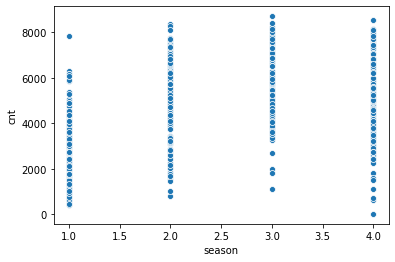

In [8]:
sns.scatterplot(data=df,x="season", y="cnt")

# Dummy Variables

# Dummy variable- Season

In [9]:
dummy1= pd.get_dummies(df["season"], drop_first=True)
dummy1

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [10]:
dummy1.rename(columns= {2:"summer",3:"fall",4:"winter" }, inplace= True)

In [11]:
dummy1.head(100)

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
95,1,0,0
96,1,0,0
97,1,0,0
98,1,0,0


In [12]:
df= pd.concat([df,dummy1], axis=1)

In [13]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,0,0
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,0,0
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,0,0
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,0


In [14]:
df= df.drop("season", axis=1)
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,01-01-2018,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


# Dummy variable- Month

In [15]:
dummy2= pd.get_dummies(df["mnth"], drop_first=True)

In [16]:
dummy2.rename(columns= {2:"feb",3:"mar",4:"april", 5:"may", 6:"june",7:"July",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}, inplace= True)

In [17]:
df= pd.concat([df,dummy2], axis=1)

In [18]:
df= df.drop("mnth", axis=1)
df.head()

,instant,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mar,april,may,june,July,aug,sep,oct,nov,dec
0,1,01-01-2018,0,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


# Dummy variable- Weekday

In [19]:
dummy3= pd.get_dummies(df["weekday"],drop_first=True)

In [20]:
dummy3.rename(columns= {1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"}, inplace= True)

In [21]:
df= pd.concat([df,dummy3], axis=1)

In [22]:
df= df.drop("weekday", axis=1)
df.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,sep,oct,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat
0,1,01-01-2018,0,0,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,0
2,3,03-01-2018,0,0,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,4,04-01-2018,0,0,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [23]:
dummy4= pd.get_dummies(df["weathersit"],drop_first=True)

In [24]:
dummy4.rename(columns= {2:"Mist",3:"Rain"}, inplace= True)

In [25]:
df= pd.concat([df,dummy4], axis=1)

In [26]:
df= df.drop("weathersit", axis=1)

In [27]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat,Mist,Rain
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,1,0
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,1,0,0,0,0,1,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


# Dropping columns that are not usefull in analysis

In [28]:
df= df.drop(["instant", "dteday", "casual", "registered"], axis=1)

In [29]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat,Mist,Rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-test data split

In [30]:
df_train, df_test = train_test_split(df, train_size= 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Re-scaling the variables

In [31]:
scaler= MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat,Mist,Rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat,Mist,Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


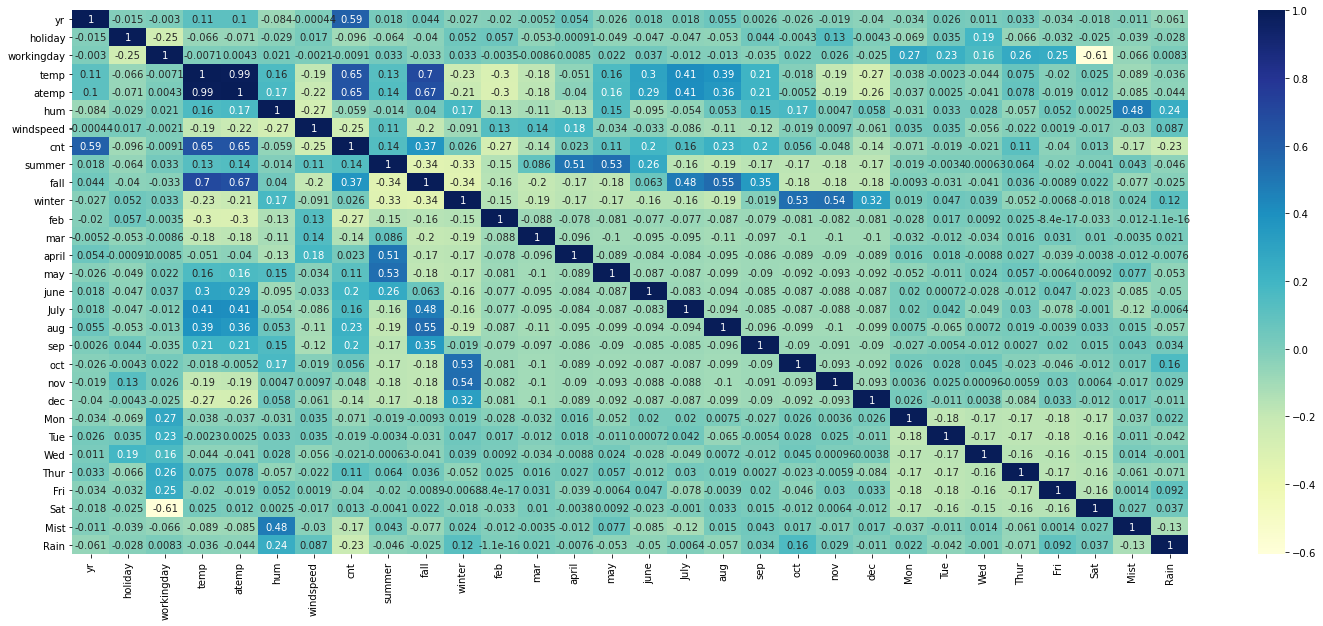

In [34]:
plt.figure(figsize= (25,10))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")

# Dividing into Xand Y sets for the model building

In [35]:
y_train = df_train.pop("cnt")
x_train= df_train

# Building Model

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe =RFE(lm,15)
rfe= rfe.fit(x_train, y_train)

In [38]:
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('feb', False, 11),
 ('mar', True, 1),
 ('april', False, 3),
 ('may', True, 1),
 ('june', False, 2),
 ('July', False, 12),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 13),
 ('dec', False, 14),
 ('Mon', False, 9),
 ('Tue', False, 10),
 ('Wed', False, 8),
 ('Thur', False, 6),
 ('Fri', False, 7),
 ('Sat', False, 15),
 ('Mist', True, 1),
 ('Rain', True, 1)]

In [39]:
col= x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'mar', 'may', 'aug', 'sep', 'oct', 'Mist', 'Rain'],
      dtype='object')

In [40]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'feb', 'april', 'june', 'July', 'nov', 'dec',
       'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'],
      dtype='object')

In [41]:
x_train_rfe= x_train[col]

In [42]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [43]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [44]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          1.00e-188
Time:                        21:41:42   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.027      8.665      0.0

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'mar', 'may', 'aug', 'sep', 'oct', 'Mist', 'Rain'],
      dtype='object')

In [47]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

# VIF

In [48]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,fall,8.80
4,windspeed,3.81
5,summer,3.75
7,winter,3.11
13,Mist,2.15
0,yr,2.05
10,aug,1.85
9,may,1.68


# Removing High VIF values

In [49]:
x_train_rfe = x_train_rfe.drop(["may"],axis=1)

In [50]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [51]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [52]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          2.46e-189
Time:                        21:41:42   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.525      0.0

In [53]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [54]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,fall,8.53
4,windspeed,3.73
5,summer,3.53
7,winter,3.05
12,Mist,2.15
0,yr,2.03
9,aug,1.85
11,oct,1.63


# Fall is insignificant in presence of other variables; can be dropped

In [55]:
x_train_rfe = x_train_rfe.drop(["fall"],axis=1)

In [56]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [57]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [58]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          5.94e-190
Time:                        21:41:43   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2326      0.027      8.525      0.0

In [59]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [60]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,winter,2.32
11,Mist,2.14
0,yr,2.02
5,summer,1.84
8,aug,1.61
10,oct,1.60
9,sep,1.34


# Dropping March as it is insignificant

In [61]:
x_train_rfe = x_train_rfe.drop(["mar"],axis=1)

In [62]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [63]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [64]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          1.49e-190
Time:                        21:41:44   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.027      8.838      0.0

In [65]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [66]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter,2.25
10,Mist,2.13
0,yr,2.02
5,summer,1.84
7,aug,1.60
9,oct,1.60
8,sep,1.34


# Dropping Oct as it is insignificant

In [67]:
x_train_rfe = x_train_rfe.drop(["oct"],axis=1)

In [68]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [69]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [70]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          7.50e-191
Time:                        21:41:45   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.623      0.0

In [71]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [72]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
9,Mist,2.13
0,yr,2.01
5,summer,1.83
6,winter,1.75
7,aug,1.59
8,sep,1.31
10,Rain,1.16


# Dropping Hum due to high VIF

In [73]:
x_train_rfe = x_train_rfe.drop(["hum"],axis=1)

In [74]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [75]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [76]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          2.62e-187
Time:                        21:41:46   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.017      7.837      0.0

In [77]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [78]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
6,aug,1.58
8,Mist,1.49
5,winter,1.48
7,sep,1.31
9,Rain,1.08
1,holiday,1.04


# Dropping temp because of high VIF

In [79]:
x_train_rfe = x_train_rfe.drop(["temp"],axis=1)

In [80]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [81]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [82]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          8.51e-108
Time:                        21:41:47   Log-Likelihood:                 306.08
No. Observations:                 510   AIC:                            -592.2
Df Residuals:                     500   BIC:                            -549.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4052      0.017     23.402      0.0

In [83]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [84]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,windspeed,2.43
0,yr,1.81
3,summer,1.52
7,Mist,1.49
4,winter,1.40
5,aug,1.16
6,sep,1.10
8,Rain,1.08
1,holiday,1.04


# Adding atemp to see if model improves

In [85]:
x_train_rfe['atemp']=x_train['atemp']

In [86]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [87]:
lrm = sm.OLS(y_train, x_train_rfe).fit() 

In [88]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          6.05e-184
Time:                        21:41:48   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1275      0.017      7.429      0.0

In [89]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [90]:
vif = pd.DataFrame()
vif["Features"] = x_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif= vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
9,atemp,4.92
2,windspeed,3.05
0,yr,2.00
3,summer,1.83
5,aug,1.55
4,winter,1.50
7,Mist,1.49
6,sep,1.30
8,Rain,1.08
1,holiday,1.04


# Residual Analysis of the train data

In [91]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
y_train_pred = lrm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

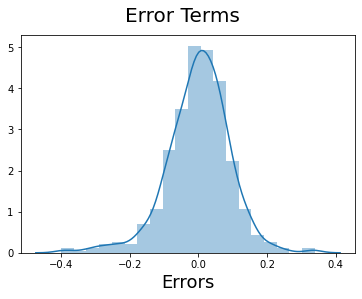

In [94]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# Making Prediction

In [95]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [96]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,Mon,Tue,Wed,Thur,Fri,Sat,Mist,Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
y_test = df_test.pop('cnt')
x_test = df_test


In [98]:
x_train_rfe = x_train_rfe.drop(["const"],axis=1)

In [99]:
x_test_rfe = x_test[x_train_rfe.columns]

x_test_rfe = sm.add_constant(x_test_rfe)

In [100]:
x_test_rfe

,const,yr,holiday,windspeed,summer,winter,aug,sep,Mist,Rain,atemp
184,1.0,0,1,0.084219,0,0,0,0,1,0,0.769660
535,1.0,1,0,0.153728,1,0,0,0,0,0,0.842587
299,1.0,0,0,0.334206,0,1,0,0,1,0,0.496145
221,1.0,0,0,0.339570,0,0,1,0,0,0,0.795343
152,1.0,0,0,0.537414,1,0,0,0,0,0,0.741471
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.283397,0,1,0,0,0,0,0.511907
127,1.0,0,0,0.069510,1,0,0,0,0,0,0.577380
640,1.0,1,0,0.052115,0,1,0,0,1,0,0.682653
72,1.0,0,0,0.203418,0,0,0,0,0,0,0.332005


In [101]:
y_pred = lrm.predict(x_test_rfe)

Text(0, 0.5, 'y_pred')

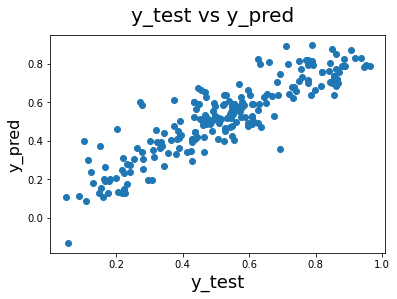

In [102]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)        
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)    

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.79425209298371

In [104]:
x_train_rfe["cnt"] = y_train

In [106]:
x_train_rfe

,yr,holiday,windspeed,summer,winter,aug,sep,Mist,Rain,atemp,cnt
576,1,0,0.264686,0,0,0,0,0,0,0.766351,0.827658
426,1,0,0.255342,0,0,0,0,1,0,0.438975,0.465255
728,1,0,0.663106,0,0,0,0,0,0,0.200348,0.204096
482,1,0,0.188475,1,0,0,0,1,0,0.391735,0.482973
111,0,0,0.380981,1,0,0,0,1,0,0.318819,0.191095
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.187140,0,0,1,0,0,0,0.824359,0.832835
53,0,0,0.111379,0,0,0,0,0,0,0.218747,0.218017
350,0,0,0.431816,0,1,0,0,1,0,0.223544,0.312586
79,0,0,0.529881,1,0,0,0,1,0,0.434043,0.236424


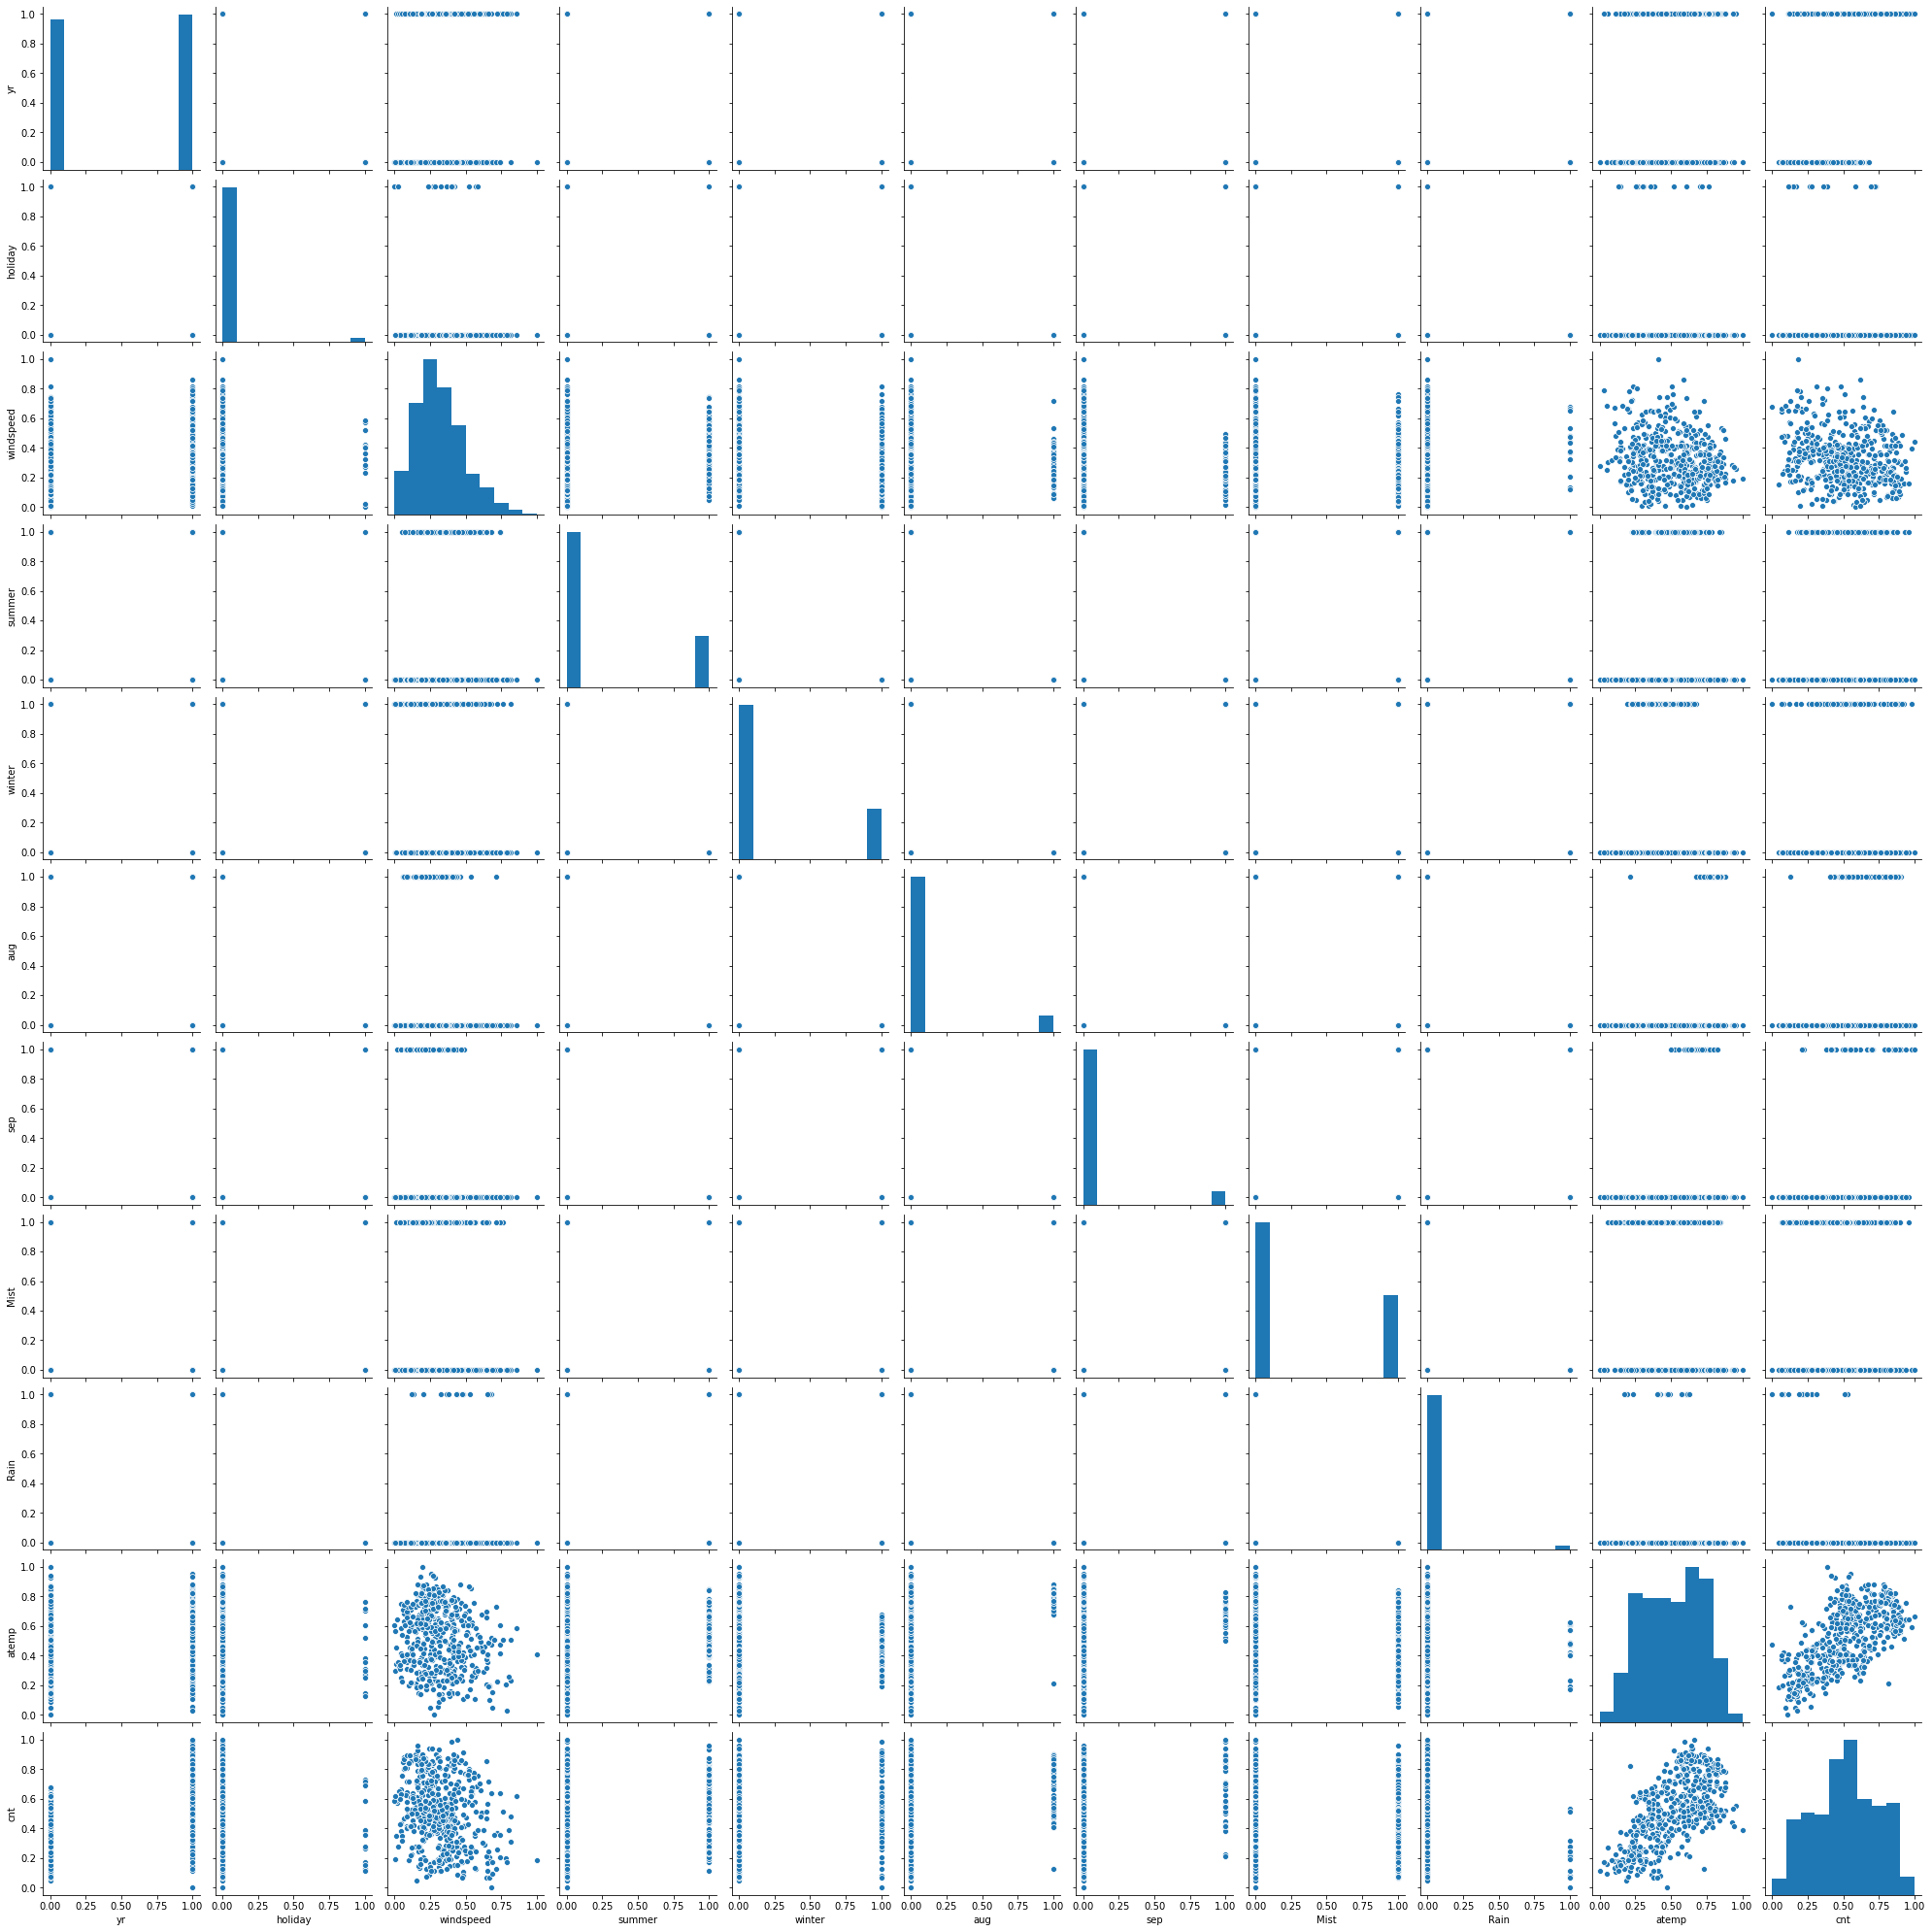

In [107]:
sns.pairplot(x_train_rfe)

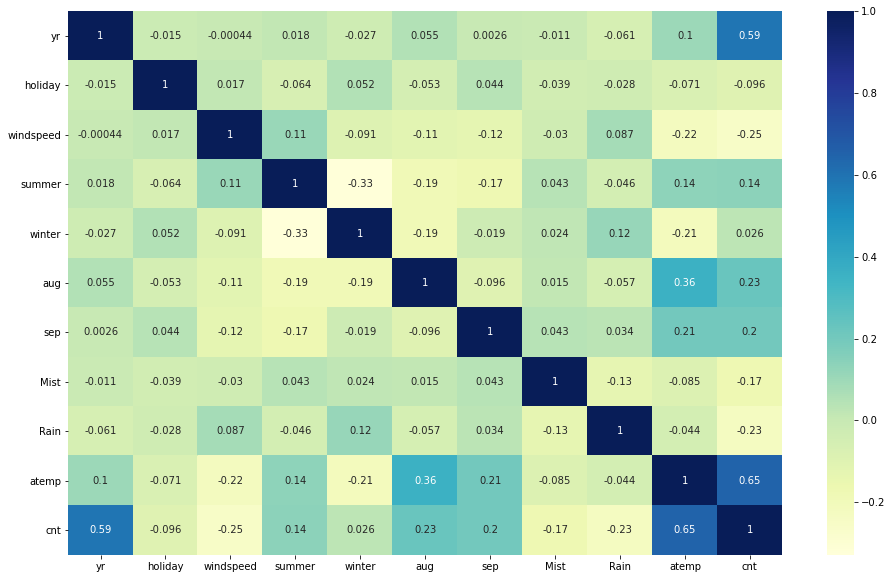

In [109]:
plt.figure(figsize= (16,10))
sns.heatmap(x_train_rfe.corr(), annot= True, cmap="YlGnBu")